In [290]:
import pandas as pd
import os
import glob
import numpy as np
import math
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from sklearn.metrics import r2_score

In [291]:
os.chdir(r'C:\Users\LILA\Desktop\RTT-FIngerprinting-with-offset\RTT-Fingerprinting with offset\Dataset\with_Offset')
extension='csv'

all_filenames=[i for i in glob.glob('*.{}'.format(extension))]

combined_csv=pd.concat([pd.read_csv(f) for f in all_filenames])
df=combined_csv
df.drop(['AP1RSS','AP2RSS','AP3RSS','True_range1','True_range2','True_range3','x1','x2','x3','y1','y2','y3'],axis=1,inplace=True)
df

,AP1RTT,AP1STDEV,AP2RTT,AP2STDEV,AP3RTT,AP3STDEV,x,y
0,11.770082,0.145,6.115656,0.150,7.698439,0.372,1,1
1,11.283082,0.407,6.145656,0.267,7.659439,0.425,1,1
2,11.067082,0.245,6.428656,0.630,7.894439,0.414,1,1
3,10.130082,0.864,5.803656,0.210,8.401439,1.739,1,1
4,11.946082,0.252,6.194656,0.105,7.620439,0.513,1,1
...,...,...,...,...,...,...,...,...
659,1.468914,0.181,7.828640,0.321,6.049282,1.047,6,8
660,1.526914,0.136,7.984640,0.226,6.020282,1.098,6,8
661,1.429914,0.150,8.062640,0.234,6.078282,1.021,6,8
662,1.380914,0.206,8.101640,0.158,6.137282,1.027,6,8


In [292]:
# Group the data by 'x' and 'y', and calculate the minimum, maximum, 25th, 50th, and 75th percentiles for each column for local feature extractions
#grouped = df.groupby(['x', 'y']).agg(['min'])

# Add the mean or average value of each column to the grouped dataframe
grouped = df.groupby(['x', 'y']).mean()
#grouped = pd.concat([grouped, grouped_mean], axis=1)

# Rename the columns and reset the index
grouped.columns = ['_'.join(col).strip() for col in grouped.columns.values]
df = grouped.reset_index()
df

,x,y,A_P_1_R_T_T,A_P_1_S_T_D_E_V,A_P_2_R_T_T,A_P_2_S_T_D_E_V,A_P_3_R_T_T,A_P_3_S_T_D_E_V
0,1,1,10.000000,1.066333,6.082763,0.141504,8.062258,0.133744
1,1,2,9.219544,0.407708,6.324555,0.486028,7.071068,0.460747
2,1,3,8.485281,0.322244,6.708204,0.787931,6.082763,0.404662
3,1,7,6.324555,0.888978,9.219544,0.873201,2.236068,0.148901
4,1,8,6.082763,0.473028,10.000000,0.330619,1.414214,0.981901
5,2,1,9.433981,0.714262,5.099020,1.246364,8.246211,0.609167
6,2,2,8.602325,0.822399,5.385165,0.216622,7.280110,0.924308
7,2,3,7.810250,0.650289,5.830952,1.513773,6.324555,1.536497
8,2,7,5.385165,0.627516,8.602325,0.727868,2.828427,0.202878
9,2,8,5.099020,0.458550,9.433981,0.145792,2.236068,1.399032


In [293]:
new_name={
          'A_P_1_R_T_T':'AP1RTT_MEAN','A_P_2_R_T_T':'AP2RTT_MEAN','A_P_3_R_T_T':'AP3RTT_MEAN',
          'A_P_1_R_S_S':'AP1RSS_MEAN', 'A_P_2_R_S_S':'AP2RSS_MEAN', 'A_P_3_R_S_S':'AP3RSS_MEAN',
          'A_P_1_S_T_D_E_V':'AP1STDEV_MEAN','A_P_2_S_T_D_E_V':'AP2STDEV_MEAN','A_P_3_S_T_D_E_V':'AP3STDEV_MEAN'}
df.rename(columns=new_name,inplace=True)
df


,x,y,AP1RTT_MEAN,AP1STDEV_MEAN,AP2RTT_MEAN,AP2STDEV_MEAN,AP3RTT_MEAN,AP3STDEV_MEAN
0,1,1,10.000000,1.066333,6.082763,0.141504,8.062258,0.133744
1,1,2,9.219544,0.407708,6.324555,0.486028,7.071068,0.460747
2,1,3,8.485281,0.322244,6.708204,0.787931,6.082763,0.404662
3,1,7,6.324555,0.888978,9.219544,0.873201,2.236068,0.148901
4,1,8,6.082763,0.473028,10.000000,0.330619,1.414214,0.981901
5,2,1,9.433981,0.714262,5.099020,1.246364,8.246211,0.609167
6,2,2,8.602325,0.822399,5.385165,0.216622,7.280110,0.924308
7,2,3,7.810250,0.650289,5.830952,1.513773,6.324555,1.536497
8,2,7,5.385165,0.627516,8.602325,0.727868,2.828427,0.202878
9,2,8,5.099020,0.458550,9.433981,0.145792,2.236068,1.399032


In [294]:
input_data=df.iloc[:,2:] 
output_data = df.iloc[:, :2]
input_data=np.array(input_data.values)
output_data=np.array(output_data.values)

In [295]:
X=input_data
y=output_data
print(output_data.shape)
print(input_data.shape)

(39, 2)
(39, 6)


In [296]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [297]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [298]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from math import sqrt
# Define the model
model = RandomForestRegressor(random_state=42)

# Define the hyperparameters to search over
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [2, 4, 6, 8]
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

# Predict on new data with the best model
best_model = grid_search.best_estimator_
RF_pred = best_model.predict(X_test)

# Calculate the mean squared error
mse = mean_squared_error(y_test, RF_pred)
print("Mean Squared Error in meter: {:.3f}" .format(mse))

rmse=sqrt(mean_squared_error(y_test, RF_pred)) 
print('Root Mean Squared Error (RMSE) on new data in meter: {:.3f}'.format(rmse))

from sklearn.metrics import mean_absolute_percentage_error
print('Mean Absolute Percentage Error (MAPE) on new data in percentage is : {:.3f}'.format(mean_absolute_percentage_error(y_test,RF_pred)*100))


print('R2 score is in percent: {:.2f}'.format(r2_score(y_test, RF_pred)*100))

Best Hyperparameters: {'max_depth': 6, 'n_estimators': 200}
Mean Squared Error in meter: 1.268
Root Mean Squared Error (RMSE) on new data in meter: 1.126
Mean Absolute Percentage Error (MAPE) on new data in percentage is : 23.012
R2 score is in percent: 70.01


In [299]:
from sklearn.neighbors import KNeighborsRegressor
from math import sqrt

# Define the parameter grid for the grid search
param_grid = {'n_neighbors': [3, 5, 7, 9]}

# Create a KNN model
knn_model = KNeighborsRegressor()

# Perform a grid search using cross-validation
grid_search = GridSearchCV(knn_model, param_grid, cv=5)
grid_search.fit(X_train,y_train)

# Print the best parameter value found by the grid search
print('Best K value found by grid search:', grid_search.best_params_['n_neighbors'])

# Get the predictions using the best K value
best_knn_model = grid_search.best_estimator_
knn_pred = best_knn_model.predict(X_test)

# Calculate the evaluation metrics
mse = mean_squared_error(y_test, knn_pred)
print('Mean Squared Error (MSE) on new data in m: {:.2f}'.format(mse))
rmse=sqrt(mean_squared_error(y_test, knn_pred)) 
print('Root Mean Squared Error (RMSE) on new data in m: {:.2f}'.format(rmse)) 

from sklearn.metrics import mean_absolute_percentage_error
print('Mean Absolute Percentage Error (MAPE) on new data in percentage is : {:.3f}'.format(mean_absolute_percentage_error(y_test,knn_pred)*100))


print('R2 score is in percent: {:.2f}'.format(r2_score(y_test, knn_pred)*100))

Best K value found by grid search: 5
Mean Squared Error (MSE) on new data in m: 1.98
Root Mean Squared Error (RMSE) on new data in m: 1.41
Mean Absolute Percentage Error (MAPE) on new data in percentage is : 29.309
R2 score is in percent: 46.89


In [300]:
import tensorflow as tf
from tensorflow import keras
from keras_tuner import RandomSearch
from keras_tuner.engine.hyperparameters import HyperParameters

# Define the model architecture
def build_model(hp):
    model = keras.Sequential()
    model.add(keras.layers.Dense(units=hp.Int('units_1', min_value=32, max_value=512, step=16), input_shape=(6,), activation='relu'))
    model.add(keras.layers.Dropout(hp.Float('dropout_1', min_value=0.0, max_value=0.5, step=0.1)))
    
    for i in range(hp.Int('num_hidden_layers', 1, 10)):
        model.add(keras.layers.Dense(units=hp.Int('units_' + str(i+2), min_value=32, max_value=512, step=16),
                                 activation=hp.Choice('activation_' + str(i+2), values=['relu','sigmoid','tanh'])))
        model.add(keras.layers.Dropout(hp.Float('dropout_' + str(i+2), min_value=0.0, max_value=0.5, step=0.1)))
    
        
    model.add(keras.layers.Dense(units=2, activation='linear'))
    
    
    model.compile(optimizer=keras.optimizers.Adam(
                        hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])),

                  loss='mean_squared_error',
                  metrics=['mse'])
    return model

In [301]:
# Define the search space

tuner = RandomSearch(
    build_model,
    objective='val_loss',
    max_trials=20,
    executions_per_trial=3,
    directory='test_raw',
    project_name='RTT_Data_raw')

INFO:tensorflow:Reloading Tuner from test_raw\RTT_Data_raw\tuner0.json


In [302]:
# Search for the best hyperparameters
tuner.search(X_train, y_train,
             epochs=200,
           validation_data=(X_test,y_test) ,
             callbacks=[keras.callbacks.EarlyStopping(patience=5)])

INFO:tensorflow:Oracle triggered exit


In [303]:
tuner.results_summary()

Results summary
Results in test_raw\RTT_Data_raw
Showing 10 best trials
Trial summary
Hyperparameters:
units_1: 256
dropout_1: 0.30000000000000004
num_hidden_layers: 4
units_2: 112
activation_2: relu
dropout_2: 0.4
learning_rate: 0.001
units_3: 112
activation_3: tanh
dropout_3: 0.30000000000000004
units_4: 48
activation_4: tanh
dropout_4: 0.30000000000000004
units_5: 32
activation_5: relu
dropout_5: 0.0
Score: 1.9503090778986614
Trial summary
Hyperparameters:
units_1: 432
dropout_1: 0.1
num_hidden_layers: 8
units_2: 96
activation_2: tanh
dropout_2: 0.2
learning_rate: 0.0001
units_3: 336
activation_3: tanh
dropout_3: 0.2
units_4: 240
activation_4: tanh
dropout_4: 0.2
units_5: 352
activation_5: tanh
dropout_5: 0.1
units_6: 80
activation_6: sigmoid
dropout_6: 0.4
units_7: 448
activation_7: tanh
dropout_7: 0.0
units_8: 512
activation_8: relu
dropout_8: 0.4
units_9: 112
activation_9: tanh
dropout_9: 0.2
units_10: 112
activation_10: tanh
dropout_10: 0.30000000000000004
units_11: 416
activati

In [304]:
best_hps=tuner.get_best_hyperparameters()[0]

dnn_model = tuner.hypermodel.build(best_hps)
#best_model = tuner.get_best_models()[0]
from keras.callbacks import EarlyStopping

n_epochs=500
#history = model.fit(X_train, y_train, epochs=n_epochs, batch_size=32, validation_split=0.2,callbacks=callbacks_list)
#history = model.fit(X_train, y_train, epochs=n_epochs, bbatch_size=32, validation_split=0.2,callbacks=callbacks_list)
history = dnn_model.fit(X_train, y_train, epochs=n_epochs, batch_size=32, validation_data=(X_test,y_test),callbacks=[keras.callbacks.EarlyStopping(patience=20)])

Epoch 1/500
1/1 [==============================] - 1s 599ms/step - loss: 18.3579 - mse: 18.3579 - val_loss: 22.9654 - val_mse: 22.9654
Epoch 2/500
1/1 [==============================] - 0s 18ms/step - loss: 17.8633 - mse: 17.8633 - val_loss: 21.9218 - val_mse: 21.9218
Epoch 3/500
1/1 [==============================] - 0s 18ms/step - loss: 16.8263 - mse: 16.8263 - val_loss: 20.8311 - val_mse: 20.8311
Epoch 4/500
1/1 [==============================] - 0s 19ms/step - loss: 15.7963 - mse: 15.7963 - val_loss: 19.6710 - val_mse: 19.6710
Epoch 5/500
1/1 [==============================] - 0s 17ms/step - loss: 14.5784 - mse: 14.5784 - val_loss: 18.3864 - val_mse: 18.3864
Epoch 6/500
1/1 [==============================] - 0s 18ms/step - loss: 13.6369 - mse: 13.6369 - val_loss: 17.0041 - val_mse: 17.0041
Epoch 7/500
1/1 [==============================] - 0s 18ms/step - loss: 13.1874 - mse: 13.1874 - val_loss: 15.5459 - val_mse: 15.5459
Epoch 8/500
1/1 [==============================] - 0s 18ms/st

In [305]:
# Evaluate the model on the test set
test_loss, test_mse = dnn_model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 14ms/step - loss: 0.8368 - mse: 0.8368


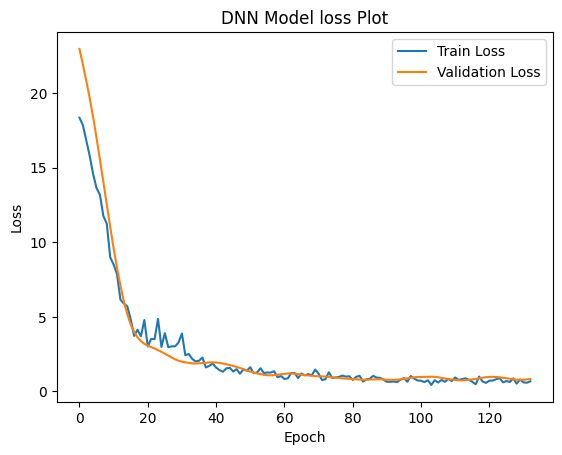

In [306]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('DNN Model loss Plot')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train Loss', 'Validation Loss'], loc='upper right')
plt.show()

In [307]:
y_pred=dnn_model.predict(X_test)
y_pred

1/1 [==============================] - 0s 41ms/step


array([[5.572992  , 1.751582  ],
       [6.5443473 , 5.9053736 ],
       [2.0752668 , 6.7745256 ],
       [3.7552557 , 2.9188218 ],
       [5.79108   , 7.6090603 ],
       [4.2236032 , 1.3423826 ],
       [1.8557719 , 0.88796324],
       [4.8156404 , 4.3652368 ],
       [6.001585  , 1.3703934 ],
       [2.4693031 , 4.9645414 ],
       [3.415608  , 7.453964  ],
       [2.21949   , 6.5213556 ]], dtype=float32)

In [308]:
from sklearn.metrics import mean_squared_error
from math import sqrt

mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error (MSE) on new data in m: {:.2f}'.format(mse))

rmse=sqrt(mean_squared_error(y_test, y_pred)) 
print('Root Mean Squared Error (RMSE) on new data in m: {:.2f}'.format(rmse))

from sklearn.metrics import mean_absolute_percentage_error
print('Mean Absolute Percentage Error (MAPE) on new data in percentage is : {:.2f}'.format(mean_absolute_percentage_error(y_test,y_pred)*100))

print('R2 score is in percent: {:.2f}'.format(r2_score(y_test, y_pred)*100))

Mean Squared Error (MSE) on new data in m: 0.84
Root Mean Squared Error (RMSE) on new data in m: 0.91
Mean Absolute Percentage Error (MAPE) on new data in percentage is : 22.55
R2 score is in percent: 78.70


In [309]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from math import sqrt
# Define the model
model = RandomForestRegressor(random_state=42)

# Define the hyperparameters to search over
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [2, 4, 6, 8]
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(y_pred, y_test)
# Print the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

# Predict on new data with the best model
best_model = grid_search.best_estimator_
RF_pred = best_model.predict(y_pred)

# Calculate the mean squared error
mse = mean_squared_error(y_test, RF_pred)
print("Mean Squared Error in meter: {:.3f}" .format(mse))

rmse=sqrt(mean_squared_error(y_test, RF_pred)) 
print('Root Mean Squared Error (RMSE) on new data in meter: {:.3f}'.format(rmse))

from sklearn.metrics import mean_absolute_percentage_error
print('Mean Absolute Percentage Error (MAPE) on new data in percentage is : {:.3f}'.format(mean_absolute_percentage_error(y_test,RF_pred)*100))

print('R2 score is in percent: {:.2f}'.format(r2_score(y_test, RF_pred)*100))

Best Hyperparameters: {'max_depth': 6, 'n_estimators': 200}
Mean Squared Error in meter: 0.208
Root Mean Squared Error (RMSE) on new data in meter: 0.456
Mean Absolute Percentage Error (MAPE) on new data in percentage is : 10.834
R2 score is in percent: 93.43


In [310]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from math import sqrt
import pandas as pd

# Define the model
model = RandomForestRegressor(random_state=42)

# Define the hyperparameters to search over
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [2, 4, 6, 8]
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(y_pred, y_test)

# Print the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

# Predict on new data with the best model
best_model = grid_search.best_estimator_
RF_pred = best_model.predict(y_pred)

# Calculate the evaluation metrics
mse = mean_squared_error(y_test, RF_pred)
rmse = sqrt(mse)
mape = mean_absolute_percentage_error(y_test, RF_pred) * 100
r2 = r2_score(y_test, RF_pred) * 100

# Store the results in a dictionary
results = {'n_estimators': [], 'max_depth': [], 'MSE': [], 'RMSE': [], 'MAPE': [], 'R2': []}

# Loop over the different values of n_estimators and max_depth
for n in param_grid['n_estimators']:
    for depth in param_grid['max_depth']:
        # Define the model with the current hyperparameters
        model = RandomForestRegressor(n_estimators=n, max_depth=depth, random_state=42)

        # Fit the model to the training data
        model.fit(y_pred, y_test)

        # Get the predictions using the trained model
        RF_pred = model.predict(y_pred)

        # Calculate the evaluation metrics
        mse = mean_squared_error(y_test, RF_pred)
        rmse = sqrt(mse)
        mape = mean_absolute_percentage_error(y_test, RF_pred) * 100
        r2 = r2_score(y_test, RF_pred) * 100

        # Store the results in the dictionary
        results['n_estimators'].append(n)
        results['max_depth'].append(depth)
        results['MSE'].append(mse)
        results['RMSE'].append(rmse)
        results['MAPE'].append(mape)
        results['R2'].append(r2)

# Print the results as a pandas dataframe
results_RF_df = pd.DataFrame(results)
print(results_RF_df)


Best Hyperparameters: {'max_depth': 6, 'n_estimators': 200}
    n_estimators  max_depth       MSE      RMSE       MAPE         R2
0             50          2  0.475914  0.689865  18.016569  85.629736
1             50          4  0.232200  0.481872   9.926844  92.420369
2             50          6  0.233983  0.483718  10.105655  92.397450
3             50          8  0.233983  0.483718  10.105655  92.397450
4            100          2  0.448047  0.669363  17.698787  86.621261
5            100          4  0.220769  0.469861  10.380312  93.044045
6            100          6  0.220912  0.470013  10.372817  93.063625
7            100          8  0.220912  0.470013  10.372817  93.063625
8            200          2  0.457308  0.676246  18.452810  86.177242
9            200          4  0.210785  0.459114  11.009625  93.344862
10           200          6  0.207820  0.455873  10.833929  93.434713
11           200          8  0.207820  0.455873  10.833929  93.434713


In [311]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for the grid search
param_grid = {'n_neighbors': [3,5,7,9]}

# Create a KNN model
knn_model = KNeighborsRegressor()

# Perform a grid search using cross-validation
grid_search = GridSearchCV(knn_model, param_grid, cv=5)
grid_search.fit(y_pred, y_test)

# Print the best parameter value found by the grid search
print('Best K value found by grid search:', grid_search.best_params_['n_neighbors'])

# Get the predictions using the best K value
best_knn_model = grid_search.best_estimator_
knn_pred = best_knn_model.predict(y_pred)

# Calculate the evaluation metrics
mse = mean_squared_error(y_test, knn_pred)
print('Mean Squared Error (MSE) on new data in m: {:.2f}'.format(mse))
rmse=sqrt(mean_squared_error(y_test, knn_pred)) 
print('Root Mean Squared Error (RMSE) on new data in m: {:.2f}'.format(rmse))
from sklearn.metrics import mean_absolute_percentage_error
print('Mean Absolute Percentage Error (MAPE) on new data in percentage is : {:.2f}'.format(mean_absolute_percentage_error(y_test,knn_pred)*100))

print('R2 score is in percent: {:.2f}'.format(r2_score(y_test, knn_pred)*100))

Best K value found by grid search: 3
Mean Squared Error (MSE) on new data in m: 0.55
Root Mean Squared Error (RMSE) on new data in m: 0.74
Mean Absolute Percentage Error (MAPE) on new data in percentage is : 21.18
R2 score is in percent: 82.90


In [312]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score
from math import sqrt
import pandas as pd

# Define the parameter grid for the grid search
param_grid = {'n_neighbors': [3, 5, 7, 9]}

# Create a KNN model
knn_model = KNeighborsRegressor()

# Perform a grid search using cross-validation
grid_search = GridSearchCV(knn_model, param_grid, cv=5)
grid_search.fit(y_pred, y_test)

# Print the best parameter value found by the grid search
print('Best K value found by grid search:', grid_search.best_params_['n_neighbors'])

# Get the predictions using the best K value
best_knn_model = grid_search.best_estimator_
knn_pred = best_knn_model.predict(y_pred)

# Calculate the evaluation metrics for the best K value
mse = mean_squared_error(y_test, knn_pred)
rmse = sqrt(mse)
mape = mean_absolute_percentage_error(y_test, knn_pred) * 100
r2 = r2_score(y_test, knn_pred)

# Store the results in a dictionary
results = {'k': [grid_search.best_params_['n_neighbors']], 'MSE': [mse], 'RMSE': [rmse], 'MAPE': [mape], 'R2': [r2]}

# Loop over the different values of K
for k in param_grid['n_neighbors']:
    # Set the K parameter of the KNN model
    knn_model.set_params(n_neighbors=k)

    # Fit the KNN model to the training data
    knn_model.fit(y_pred, y_test)

    # Get the predictions using the trained KNN model
    knn_pred = knn_model.predict(y_pred)

    # Calculate the evaluation metrics
    mse = mean_squared_error(y_test, knn_pred)
    rmse = sqrt(mse)
    mape = mean_absolute_percentage_error(y_test, knn_pred) * 100
    r2 = r2_score(y_test, knn_pred)

    # Store the results in the dictionary
    results['k'].append(k)
    results['MSE'].append(mse)
    results['RMSE'].append(rmse)
    results['MAPE'].append(mape)
    results['R2'].append(r2)

# Print the results as a pandas dataframe
results_KNN_df = pd.DataFrame(results)
print(results_KNN_df)


Best K value found by grid search: 3
   k       MSE      RMSE       MAPE        R2
0  3  0.546296  0.739119  21.183862  0.829019
1  3  0.546296  0.739119  21.183862  0.829019
2  5  1.055000  1.027132  30.556548  0.673909
3  7  1.319728  1.148794  34.649943  0.582559
4  9  2.136831  1.461790  43.155864  0.367028


In [313]:
from tensorflow.keras.models import load_model

dnn_model.save('my_DNN_Regrr_model_xy_no_feature_extraction.h5')


In [314]:
loaded_model = load_model('my_DNN_Regrr_model_xy_no_feature_extraction.h5')
loaded_model

In [315]:
# dfff=pd.read_csv('D:/testt.csv')
data_folder = r'C:\Users\LILA\Desktop\RTT-FIngerprinting-with-offset\RTT-Fingerprinting with offset\Dataset\Test_dataset\With_offset'
os.chdir(data_folder)
extension='csv'

all_filenames=[i for i in glob.glob('*.{}'.format(extension))]

combined_csv=pd.concat([pd.read_csv(f) for f in all_filenames])
dfff=combined_csv
dfff.drop(['AP1RSS','AP2RSS','AP3RSS','True_range1','True_range2','True_range3','x1','x2','x3','y1','y2','y3'],axis=1,inplace=True)
dfff

,AP1RTT,AP1STDEV,AP2RTT,AP2STDEV,AP3RTT,AP3STDEV,x,y
0,9.668149,1.209,6.055633,0.163,8.026878,0.140,1,1
1,9.727149,1.174,6.055633,0.162,8.055878,0.150,1,1
2,9.580149,1.205,6.055633,0.140,8.114878,0.125,1,1
3,9.697149,1.191,6.016633,0.126,7.977878,0.165,1,1
4,9.815149,1.128,6.055633,0.186,8.084878,0.145,1,1
...,...,...,...,...,...,...,...,...
218,1.482527,0.661,8.242545,0.126,6.282632,0.907,6,8
219,1.511527,0.165,8.242545,0.141,6.517632,0.874,6,8
220,1.580527,0.136,8.281545,0.126,6.722632,0.577,6,8
221,1.306527,1.239,8.359545,0.065,6.077632,1.011,6,8


In [316]:
# Add the mean or average value of each column to the grouped dataframe
grouped = dfff.groupby(['x', 'y']).mean()
#grouped = pd.concat([grouped, grouped_mean], axis=1)

# Rename the columns and reset the index
grouped.columns = ['_'.join(col).strip() for col in grouped.columns.values]
dffff = grouped.reset_index()

In [317]:
new_name={
          'A_P_1_R_T_T':'AP1RTT_MEAN','A_P_2_R_T_T':'AP2RTT_MEAN','A_P_3_R_T_T':'AP3RTT_MEAN',
          'A_P_1_R_S_S':'AP1RSS_MEAN', 'A_P_2_R_S_S':'AP2RSS_MEAN', 'A_P_3_R_S_S':'AP3RSS_MEAN',
          'A_P_1_S_T_D_E_V':'AP1STDEV_MEAN','A_P_2_S_T_D_E_V':'AP2STDEV_MEAN','A_P_3_S_T_D_E_V':'AP3STDEV_MEAN'}
dffff.rename(columns=new_name,inplace=True)
dffff

,x,y,AP1RTT_MEAN,AP1STDEV_MEAN,AP2RTT_MEAN,AP2STDEV_MEAN,AP3RTT_MEAN,AP3STDEV_MEAN
0,1,1,10.000000,1.125597,6.082763,0.159604,8.062258,0.123617
1,1,2,9.219544,0.394583,6.324555,0.445696,7.071068,0.493212
2,1,3,8.485281,0.273084,6.708204,1.123449,6.082763,0.400470
3,1,7,6.324555,1.715281,9.219544,1.308120,2.236068,0.636366
4,1,8,6.082763,0.534206,10.000000,0.375055,1.414214,0.980824
5,2,1,9.433981,0.809003,5.099020,0.990327,8.246211,0.883837
6,2,2,8.602325,0.752261,5.385165,0.211597,7.280110,0.919855
7,2,3,7.810250,0.524892,5.830952,1.316199,6.324555,1.820406
8,2,7,5.385165,0.611780,8.602325,0.707883,2.828427,0.206484
9,2,8,5.099020,0.480833,9.433981,0.141216,2.236068,1.372664


In [387]:
input_data=dffff.iloc[:,2:] 
output_data = dffff.iloc[:, :2]
input_data=np.array(input_data.values)
output_data=np.array(output_data.values)

# input_data=dfff.iloc[:,:6] 
# output_data = dfff.iloc[:, 6:]
# input_data=np.array(input_data.values)
# output_data=np.array(output_data.values)
print(input_data)
print(output_data)

[[10.          1.1255974   6.08276253  0.1596039   8.06225775  0.12361688]
 [ 9.21954446  0.39458304  6.32455532  0.44569611  7.07106781  0.49321201]
 [ 8.48528137  0.27308421  6.70820393  1.12344912  6.08276253  0.40047018]
 [ 6.32455532  1.71528052  9.21954446  1.30811972  2.23606798  0.6363662 ]
 [ 6.08276253  0.53420606 10.          0.37505455  1.41421356  0.98082424]
 [ 9.43398113  0.8090034   5.09901951  0.99032653  8.24621125  0.88383673]
 [ 8.60232527  0.75226073  5.38516481  0.21159736  7.28010989  0.91985479]
 [ 7.81024968  0.52489205  5.83095189  1.31619886  6.32455532  1.82040625]
 [ 5.38516481  0.61178006  8.60232527  0.7078827   2.82842712  0.20648387]
 [ 5.09901951  0.48083333  9.43398113  0.14121642  2.23606798  1.37266418]
 [ 8.94427191  0.46257453  4.12310563  1.92878882  8.54400375  1.73279503]
 [ 8.06225775  0.95426012  4.47213595  0.74130058  7.61577311  0.49110694]
 [ 7.21110255  1.40443799  5.          2.03592348  6.70820393  0.2378628 ]
 [ 6.40312424  2.00688352

In [388]:
XX=input_data
yy=output_data
print(output_data.shape)
print(input_data.shape)

(37, 2)
(37, 6)


In [389]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
XX= sc.fit_transform(XX)

In [390]:
y_predd=loaded_model.predict(XX)
y_predd

2/2 [==============================] - 0s 997us/step


array([[0.9909694 , 0.8817518 ],
       [0.7039019 , 1.3970354 ],
       [1.0277166 , 2.5518472 ],
       [2.6615076 , 7.3886986 ],
       [2.2573314 , 7.2977343 ],
       [2.1523137 , 0.8226955 ],
       [1.2121953 , 0.88826656],
       [2.0779467 , 3.093361  ],
       [2.4045448 , 7.116048  ],
       [2.6857433 , 7.5491467 ],
       [3.3406172 , 1.1641427 ],
       [2.196423  , 0.85266334],
       [3.4101129 , 2.4666324 ],
       [4.552554  , 4.9833355 ],
       [2.471511  , 4.786553  ],
       [3.394106  , 6.7079725 ],
       [3.4177742 , 7.541871  ],
       [3.7557244 , 7.892457  ],
       [4.424257  , 0.9924038 ],
       [3.8777542 , 1.4340321 ],
       [4.119748  , 2.304544  ],
       [4.4601684 , 3.7068121 ],
       [4.357253  , 8.154852  ],
       [4.99439   , 1.04925   ],
       [6.0436378 , 1.640611  ],
       [4.8685484 , 2.5204215 ],
       [4.7309403 , 5.466669  ],
       [5.6764493 , 6.6643753 ],
       [5.640008  , 7.4480424 ],
       [5.4657907 , 7.944753  ],
       [6.

In [391]:
from sklearn.metrics import mean_squared_error
from math import sqrt

mse = mean_squared_error(yy, y_predd)
print('Mean Squared Error (MSE) on new data in mm: {:.2f}'.format(mse))

rmse=sqrt(mean_squared_error(yy, y_predd)) 
print('Root Mean Squared Error (RMSE) on new data in mm: {:.2f}'.format(rmse))
from sklearn.metrics import mean_absolute_percentage_error
print('Mean Absolute Percentage Error (MAPE) on new data in percentage is : {:.2f}'.format(mean_absolute_percentage_error(yy,y_predd)*100))

print('R2 score is in percent: {:.2f}'.format(r2_score(yy, y_predd)*100))

Mean Squared Error (MSE) on new data in mm: 0.34
Root Mean Squared Error (RMSE) on new data in mm: 0.58
Mean Absolute Percentage Error (MAPE) on new data in percentage is : 16.93
R2 score is in percent: 90.93


In [392]:
yy=pd.DataFrame(yy,columns=['x','y'])
y_predd=pd.DataFrame(y_predd, columns=['predicted_x','predicted_y'])
df_finall_dnn = pd.DataFrame()
df_finall_dnn = pd.concat([y_predd, yy], axis=1)
df_finall_dnn

,predicted_x,predicted_y,x,y
0,0.990969,0.881752,1,1
1,0.703902,1.397035,1,2
2,1.027717,2.551847,1,3
3,2.661508,7.388699,1,7
4,2.257331,7.297734,1,8
5,2.152314,0.822695,2,1
6,1.212195,0.888267,2,2
7,2.077947,3.093361,2,3
8,2.404545,7.116048,2,7
9,2.685743,7.549147,2,8


In [393]:
XX=pd.DataFrame(XX,columns=['AP1','AP1STDV','AP2','AP2STDV','AP3','AP#STDV'])
df_finalll_dnn = pd.concat([y_predd, yy,XX], axis=1)
df_finalll_dnn

,predicted_x,predicted_y,x,y,AP1,AP1STDV,AP2,AP2STDV,AP3,AP#STDV
0,0.990969,0.881752,1,1,1.782069,0.488714,0.134157,-0.972302,0.799583,-1.361107
1,0.703902,1.397035,1,2,1.422093,-0.925163,0.244651,-0.440219,0.339722,-0.626532
2,1.027717,2.551847,1,3,1.083423,-1.160157,0.419969,0.820286,-0.118801,-0.810858
3,2.661508,7.388699,1,7,0.086813,1.629238,1.567593,1.163742,-1.903468,-0.342012
4,2.257331,7.297734,1,8,-0.024711,-0.655114,1.924243,-0.571600,-2.284765,0.342603
5,2.152314,0.822695,2,1,1.521000,-0.123620,-0.315390,0.572701,0.884928,0.149839
6,1.212195,0.888267,2,2,1.137408,-0.233368,-0.184629,-0.875603,0.436707,0.221425
7,2.077947,3.093361,2,3,0.772072,-0.673128,0.019086,1.178768,-0.006621,2.011281
8,2.404545,7.116048,2,7,-0.346470,-0.505076,1.285538,0.047403,-1.628644,-1.196408
9,2.685743,7.549147,2,8,-0.478451,-0.758344,1.665586,-1.006500,-1.903468,1.121389


In [394]:
# df_finall_dnn.to_csv('output_data_dnn_no_ex.csv', index=False)

In [395]:
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.metrics import mean_squared_error
# from sklearn.model_selection import GridSearchCV
# from math import sqrt
# from sklearn.metrics import r2_score

# # Define the model
# model = RandomForestRegressor(random_state=42)

# # Define the hyperparameters to search over
# param_grid = {
#     'n_estimators': [50, 100, 200],
#     'max_depth': [2, 4, 6, 8]
# }

# # Perform grid search with cross-validation
# grid_search = GridSearchCV(model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
# grid_search.fit(y_predd,yy)
# # Print the best hyperparameters
# print("Best Hyperparameters:", grid_search.best_params_)

# # Predict on new data with the best model
# best_model = grid_search.best_estimator_
# RF_pred = best_model.predict(y_predd)

# # Calculate the mean squared error
# mse = mean_squared_error(yy, RF_pred)
# print("Mean Squared Error in meter: {:.3f}" .format(mse))

# rmse=sqrt(mean_squared_error(yy, RF_pred)) 
# print('Root Mean Squared Error (RMSE) on new data in meter: {:.3f}'.format(rmse))

# from sklearn.metrics import mean_absolute_percentage_error
# print('Mean Absolute Percentage Error (MAPE) on new data in percentage is : {:.2f}'.format(mean_absolute_percentage_error(yy,RF_pred)*100))


# print('R2 score is in percent: {:.2f}'.format(r2_score(yy, RF_pred)*100))

In [396]:
best_model.fit(y_predd,yy)
RF_pred = best_model.predict(y_predd)

# Calculate the mean squared error
mse = mean_squared_error(yy, RF_pred)
print("Mean Squared Error in meter: {:.3f}" .format(mse))

rmse=sqrt(mean_squared_error(yy, RF_pred)) 
print('Root Mean Squared Error (RMSE) on new data in meter: {:.3f}'.format(rmse))

from sklearn.metrics import mean_absolute_percentage_error
print('Mean Absolute Percentage Error (MAPE) on new data in percentage is : {:.2f}'.format(mean_absolute_percentage_error(yy,RF_pred)*100))


print('R2 score is in percent: {:.2f}'.format(r2_score(yy, RF_pred)*100))

Mean Squared Error in meter: 0.063
Root Mean Squared Error (RMSE) on new data in meter: 0.251
Mean Absolute Percentage Error (MAPE) on new data in percentage is : 9.17
R2 score is in percent: 98.38


In [397]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import r2_score

# Define the model with hyperparameters
model = RandomForestRegressor(n_estimators=100, max_depth=6, random_state=42)

# Train the model on the training data
model.fit(y_predd,yy)

# Use the model to predict on the test data
RF_pred = model.predict(y_predd)


# Calculate the mean squared error
mse = mean_squared_error(yy, RF_pred)
print("Mean Squared Error in meter: {:.3f}".format(mse))

rmse = sqrt(mean_squared_error(yy, RF_pred))
print('Root Mean Squared Error (RMSE) on new data in meter: {:.3f}'.format(rmse))

from sklearn.metrics import mean_absolute_percentage_error
print('Mean Absolute Percentage Error (MAPE) on new data in percentage is : {:.2f}'.format(mean_absolute_percentage_error(yy, RF_pred)*100))

print('R2 score is in percent: {:.2f}'.format(r2_score(yy, RF_pred)*100))


Mean Squared Error in meter: 0.061
Root Mean Squared Error (RMSE) on new data in meter: 0.247
Mean Absolute Percentage Error (MAPE) on new data in percentage is : 9.10
R2 score is in percent: 98.43


In [426]:
yy=pd.DataFrame(yy,columns=['x','y'])
y_predd=pd.DataFrame(RF_pred, columns=['predicted_x','predicted_y'])
df_finall = pd.DataFrame()
df_finall = pd.concat([y_predd, yy], axis=1)
df_finall

,predicted_x,predicted_y,x,y
0,1.306667,1.3600,1,1
1,1.380000,1.8200,1,2
2,1.325000,2.8350,1,3
3,1.273333,7.3000,1,7
4,1.200000,7.6800,1,8
5,2.216667,1.3700,2,1
6,1.790000,1.8250,2,2
7,2.065000,2.8950,2,3
8,1.673333,7.2900,2,7
9,1.790000,7.7100,2,8


In [399]:
# df_finall.to_csv('output_data_no_ex.csv', index=False)

In [400]:
best_knn_model.fit(y_predd, yy)
knn_pred = best_knn_model.predict(y_predd)

# Calculate the evaluation metrics
mse = mean_squared_error(yy, knn_pred)
print('Mean Squared Error (MSE) on new data in m: {:.2f}'.format(mse))
rmse=sqrt(mean_squared_error(yy, knn_pred)) 
print('Root Mean Squared Error (RMSE) on new data in m: {:.2f}'.format(rmse))

from sklearn.metrics import mean_absolute_percentage_error
print('Mean Absolute Percentage Error (MAPE) on new data in percentage is : {:.2f}'.format(mean_absolute_percentage_error(yy,knn_pred)*100))

print('R2 score is in percent: {:.2f}'.format(r2_score(yy, knn_pred)*100))

Mean Squared Error (MSE) on new data in m: 0.15
Root Mean Squared Error (RMSE) on new data in m: 0.39
Mean Absolute Percentage Error (MAPE) on new data in percentage is : 13.44
R2 score is in percent: 96.29


In [401]:
# from sklearn.neighbors import KNeighborsRegressor
# from sklearn.model_selection import GridSearchCV

# # Define the parameter grid for the grid search
# param_grid = {'n_neighbors': [3,5,7,9]}

# # Create a KNN model
# knn_model = KNeighborsRegressor()

# # Perform a grid search using cross-validation
# grid_search = GridSearchCV(knn_model, param_grid, cv=5)
# grid_search.fit(y_predd, yy)

# # Print the best parameter value found by the grid search
# print('Best K value found by grid search:', grid_search.best_params_['n_neighbors'])

# # Get the predictions using the best K value
# best_knn_model = grid_search.best_estimator_
# knn_pred = best_knn_model.predict(y_predd)

# # Calculate the evaluation metrics
# mse = mean_squared_error(yy, knn_pred)
# print('Mean Squared Error (MSE) on new data in m: {:.2f}'.format(mse))
# rmse=sqrt(mean_squared_error(yy, knn_pred)) 
# print('Root Mean Squared Error (RMSE) on new data in m: {:.2f}'.format(rmse))

# from sklearn.metrics import mean_absolute_percentage_error
# print('Mean Absolute Percentage Error (MAPE) on new data in percentage is : {:.2f}'.format(mean_absolute_percentage_error(yy,knn_pred)*100))

# print('R2 score is in percent: {:.2f}'.format(r2_score(yy, knn_pred)*100))

In [402]:
yy=pd.DataFrame(yy,columns=['x','y'])
y_predd=pd.DataFrame(knn_pred, columns=['predicted_x','predicted_y'])
df_finall_KNN = pd.DataFrame()
df_finall_KNN = pd.concat([y_predd, yy], axis=1)
df_finall_KNN

,predicted_x,predicted_y,x,y
0,1.333333,1.666667,1,1
1,1.333333,1.666667,1,2
2,1.333333,2.666667,1,3
3,1.333333,7.333333,1,7
4,1.333333,7.666667,1,8
5,2.333333,1.666667,2,1
6,1.666667,1.666667,2,2
7,1.666667,2.666667,2,3
8,1.666667,7.333333,2,7
9,1.666667,7.666667,2,8


In [403]:
# df_finall_KNN.to_csv('output_data__KNN_no_ex.csv', index=False)

In [404]:
df_finalll_dnn.head()

,predicted_x,predicted_y,x,y,AP1,AP1STDV,AP2,AP2STDV,AP3,AP#STDV
0,0.990969,0.881752,1,1,1.782069,0.488714,0.134157,-0.972302,0.799583,-1.361107
1,0.703902,1.397035,1,2,1.422093,-0.925163,0.244651,-0.440219,0.339722,-0.626532
2,1.027717,2.551847,1,3,1.083423,-1.160157,0.419969,0.820286,-0.118801,-0.810858
3,2.661508,7.388699,1,7,0.086813,1.629238,1.567593,1.163742,-1.903468,-0.342012
4,2.257331,7.297734,1,8,-0.024711,-0.655114,1.924243,-0.571600,-2.284765,0.342603


In [405]:
df.head()

,x,y,AP1RTT_MEAN,AP1STDEV_MEAN,AP2RTT_MEAN,AP2STDEV_MEAN,AP3RTT_MEAN,AP3STDEV_MEAN
0,1,1,10.000000,1.066333,6.082763,0.141504,8.062258,0.133744
1,1,2,9.219544,0.407708,6.324555,0.486028,7.071068,0.460747
2,1,3,8.485281,0.322244,6.708204,0.787931,6.082763,0.404662
3,1,7,6.324555,0.888978,9.219544,0.873201,2.236068,0.148901
4,1,8,6.082763,0.473028,10.000000,0.330619,1.414214,0.981901


In [406]:
results_KNN_df

,k,MSE,RMSE,MAPE,R2
0,3,0.546296,0.739119,21.183862,0.829019
1,3,0.546296,0.739119,21.183862,0.829019
2,5,1.055000,1.027132,30.556548,0.673909
3,7,1.319728,1.148794,34.649943,0.582559
4,9,2.136831,1.461790,43.155864,0.367028


In [407]:
results_RF_df

,n_estimators,max_depth,MSE,RMSE,MAPE,R2
0,50,2,0.475914,0.689865,18.016569,85.629736
1,50,4,0.232200,0.481872,9.926844,92.420369
2,50,6,0.233983,0.483718,10.105655,92.397450
3,50,8,0.233983,0.483718,10.105655,92.397450
4,100,2,0.448047,0.669363,17.698787,86.621261
5,100,4,0.220769,0.469861,10.380312,93.044045
6,100,6,0.220912,0.470013,10.372817,93.063625
7,100,8,0.220912,0.470013,10.372817,93.063625
8,200,2,0.457308,0.676246,18.452810,86.177242
9,200,4,0.210785,0.459114,11.009625,93.344862


In [408]:
results_KNN_df

,k,MSE,RMSE,MAPE,R2
0,3,0.546296,0.739119,21.183862,0.829019
1,3,0.546296,0.739119,21.183862,0.829019
2,5,1.055000,1.027132,30.556548,0.673909
3,7,1.319728,1.148794,34.649943,0.582559
4,9,2.136831,1.461790,43.155864,0.367028


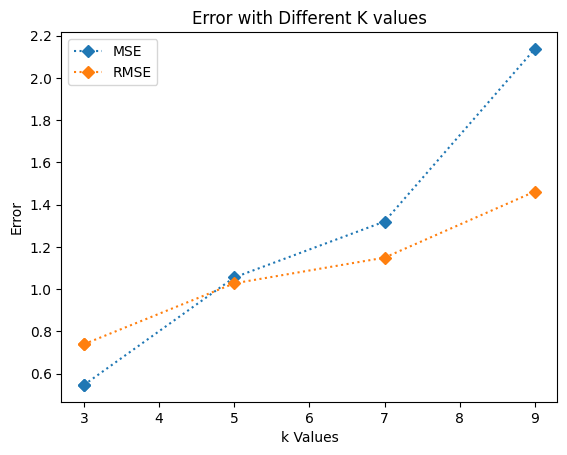

In [470]:
import matplotlib.pyplot as plt

# Select the columns to plot
df_plot = results_KNN_df[['k', 'MSE', 'RMSE']]

# Set the index to be the 'k' column
df_plot = df_plot.set_index('k')

# Plot the data
df_plot.plot(kind='line', linestyle='dotted', marker='D')

# Set the x-axis label
plt.xlabel('k Values')

# Set the y-axis label
plt.ylabel('Error')
plt.title('Error with Different K values')
# Show the plot
plt.show()


<Figure size 2000x1600 with 0 Axes>

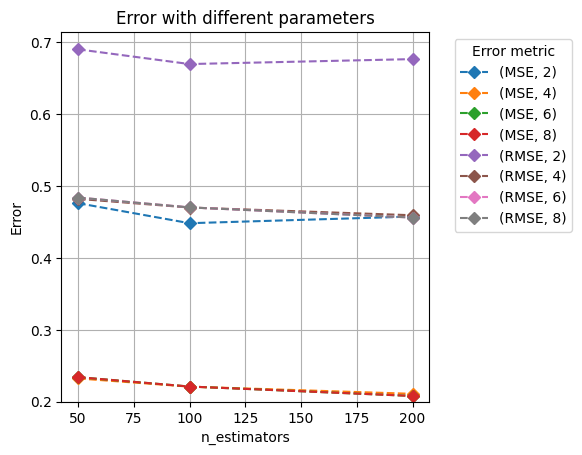

In [471]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(20, 16))

# Select the columns to plot
df_plot = results_RF_df[['n_estimators', 'max_depth', 'MSE', 'RMSE']]

# Pivot the max_depth level to columns
df_plot = df_plot.set_index(['n_estimators','max_depth'])[['MSE', 'RMSE']].unstack() #unstack() method to reshape the dataframe so that it can be plotted more easily.  unstack() method to pivot the max_depth level to columns.

# Plot the data
df_plot.plot(kind='line', marker='D', linestyle='--')

# Set the x-axis label
plt.xlabel('n_estimators')

# Set the y-axis label
plt.ylabel('Error')
plt.grid()

# Set the legend title
legend = plt.legend(title='Error metric', loc='best', bbox_to_anchor=(1.05, 1))

# Set the legend outside of the plot
plt.subplots_adjust(right=0.7)
# Set the y-axis limits
plt.ylim(0.2)
plt.title('Error with different parameters')
# Show the plot
plt.show()


In [411]:
df_finall

,predicted_x,predicted_y,x,y
0,1.306667,1.3600,1,1
1,1.380000,1.8200,1,2
2,1.325000,2.8350,1,3
3,1.273333,7.3000,1,7
4,1.200000,7.6800,1,8
5,2.216667,1.3700,2,1
6,1.790000,1.8250,2,2
7,2.065000,2.8950,2,3
8,1.673333,7.2900,2,7
9,1.790000,7.7100,2,8


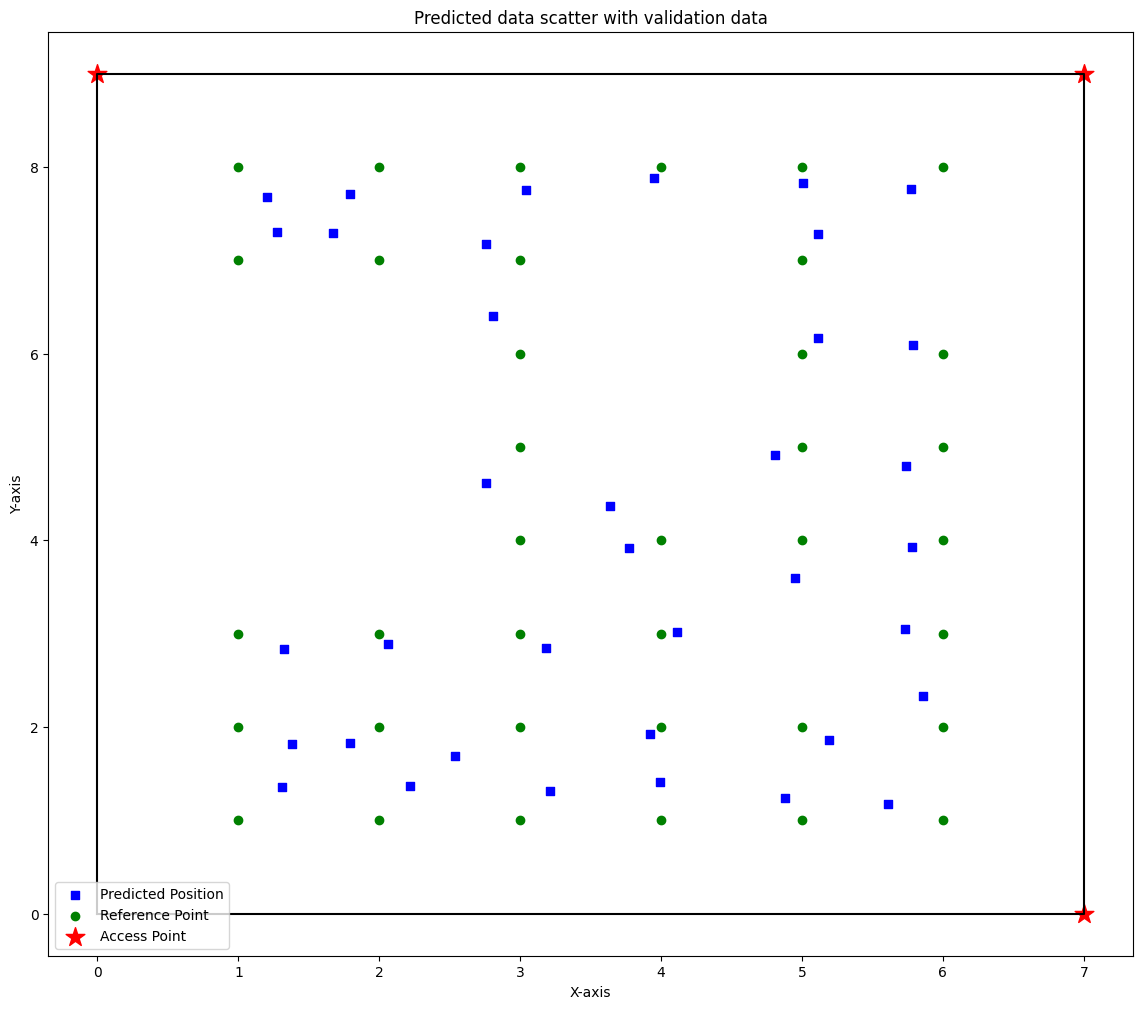

In [469]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14,12))

# Set up the room coordinates
x = [0, 7, 7, 0, 0]
y = [0, 0, 9, 9, 0]

# Plot the room as a polygon
plt.plot(x, y, color='black')

plt.scatter(df_finall['predicted_x'], df_finall['predicted_y'], color='blue', marker='s', label='Predicted Position')
plt.scatter(df_finall['x'], df_finall['y'], color='green', label='Reference Point')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Predicted data scatter with validation data')
plt.legend(loc='best')

# Highlight specific points with a red star symbol
plt.scatter(7, 0, marker='*', color='red', s=200, label='Access Point')
plt.scatter(0, 9, marker='*', color='red', s=200)
plt.scatter(7, 9, marker='*', color='red', s=200)

plt.legend(loc='lower left')

plt.show()


In [427]:
df_finall['errorx']=df_finall['predicted_x']-df_finall['x']

In [428]:
df_finall['errory']=df_finall['predicted_y']-df_finall['y']
df_finall

,predicted_x,predicted_y,x,y,errorx,errory
0,1.306667,1.3600,1,1,0.306667,0.3600
1,1.380000,1.8200,1,2,0.380000,-0.1800
2,1.325000,2.8350,1,3,0.325000,-0.1650
3,1.273333,7.3000,1,7,0.273333,0.3000
4,1.200000,7.6800,1,8,0.200000,-0.3200
5,2.216667,1.3700,2,1,0.216667,0.3700
6,1.790000,1.8250,2,2,-0.210000,-0.1750
7,2.065000,2.8950,2,3,0.065000,-0.1050
8,1.673333,7.2900,2,7,-0.326667,0.2900
9,1.790000,7.7100,2,8,-0.210000,-0.2900


In [432]:
df_finall['abs_error']= df_finall['errorx']+df_finall['errory']

In [433]:
df_finall

,predicted_x,predicted_y,x,y,errorx,errory,abs_error
0,1.306667,1.3600,1,1,0.306667,0.3600,0.666667
1,1.380000,1.8200,1,2,0.380000,-0.1800,0.200000
2,1.325000,2.8350,1,3,0.325000,-0.1650,0.160000
3,1.273333,7.3000,1,7,0.273333,0.3000,0.573333
4,1.200000,7.6800,1,8,0.200000,-0.3200,-0.120000
5,2.216667,1.3700,2,1,0.216667,0.3700,0.586667
6,1.790000,1.8250,2,2,-0.210000,-0.1750,-0.385000
7,2.065000,2.8950,2,3,0.065000,-0.1050,-0.040000
8,1.673333,7.2900,2,7,-0.326667,0.2900,-0.036667
9,1.790000,7.7100,2,8,-0.210000,-0.2900,-0.500000
